In [1]:
import seaborn as sb
import pandas as pd
import kneed
from matplotlib import pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
import numpy as np
from sklearn.decomposition import PCA


In [2]:
def read_file(url):

    url = url + "?raw=true"
    df = pd.read_csv(url, encoding='cp1252', sep=',', low_memory=False)
    return df

In [3]:
url = "https://github.com/hannahgathu/Thesis-Data-Visualisations/blob/main/All_Data_Prepped.csv"

df= read_file(url).iloc[:65378,:]

In [4]:
features= df.iloc[:,3:]

## Scaling the features

In [5]:
# scaler = StandardScaler()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

## PCA with 5 clusters

In [25]:
pca = PCA(5)
data = pca.fit_transform(scaled_features)

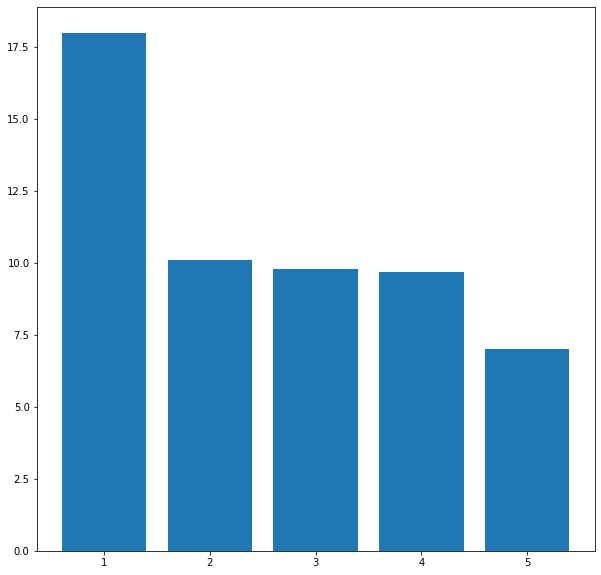

In [26]:
plt.figure(figsize=(10,10))
var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
lbls = [str(x) for x in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1), height = var, tick_label = lbls)
plt.show()

## Checking number of clusters

In [12]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

### Elbow method
The elbow method suggests that there are 5 clusters.

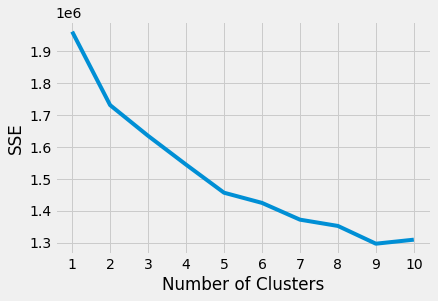

In [13]:
 plt.style.use("fivethirtyeight")
 plt.plot(range(1, 11), sse)
 plt.xticks(range(1, 11))
 plt.xlabel("Number of Clusters")
 plt.ylabel("SSE")
 plt.show()

In [14]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

5

In [15]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

### Silhouette method
The silhouette method suggests that 2 or 3 clusters would be better than 5. However, the silhouette scores seem pretty bad for either of the options..

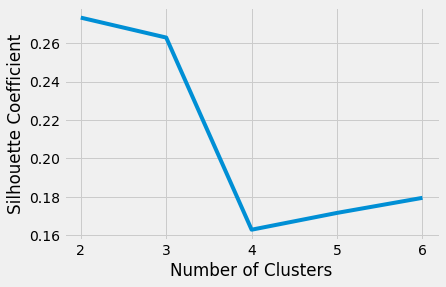

In [16]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 7), silhouette_coefficients)
plt.xticks(range(2, 7))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

## K-means with 3 clusters

In [56]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300
)

In [57]:
kmeans.fit(data)

KMeans(init='random', n_clusters=3)

In [58]:
# The lowest SSE value
kmeans.inertia_

735243.9825298832

In [59]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[ 3.51835129e+00, -1.20529101e+00,  1.57040848e+00,
         1.03647511e-01,  1.39568455e+01],
       [-1.33269283e+00, -3.74662591e-02,  7.08279609e-02,
         9.47750868e-02, -8.24804402e-03],
       [ 2.57598917e+00,  1.03936635e-01, -1.79374009e-01,
        -1.91743992e-01, -3.20811731e-01]])

In [12]:
# The number of iterations required to converge
kmeans.n_iter_

31

In [33]:
kmeans_silhouette = silhouette_score(
    scaled_features, kmeans.labels_
).round(2)

kmeans_silhouette

0.26

### Scatter plot of clusters: PC1 vs PC2

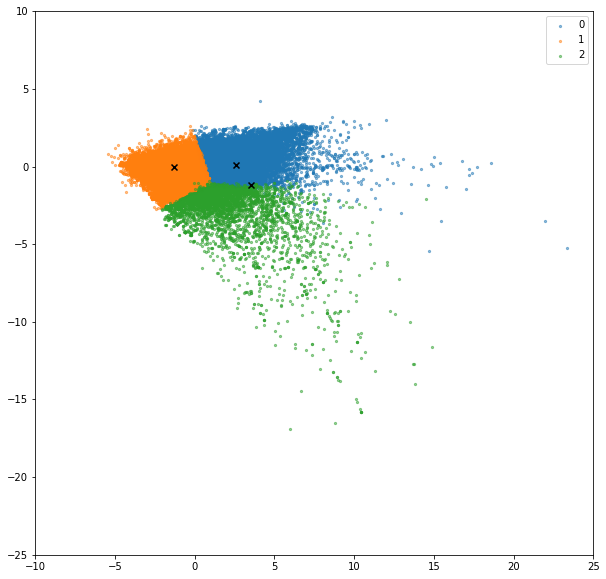

In [44]:
centers = kmeans.cluster_centers_
label = kmeans.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i, s=5, alpha=0.5)
plt.scatter(centers[:,0], centers[:,1], marker="x",color='k')
#This is done to find the centroid for each clusters.
plt.xlim(-10,25)
plt.ylim(-25,10)
plt.legend()
plt.show()

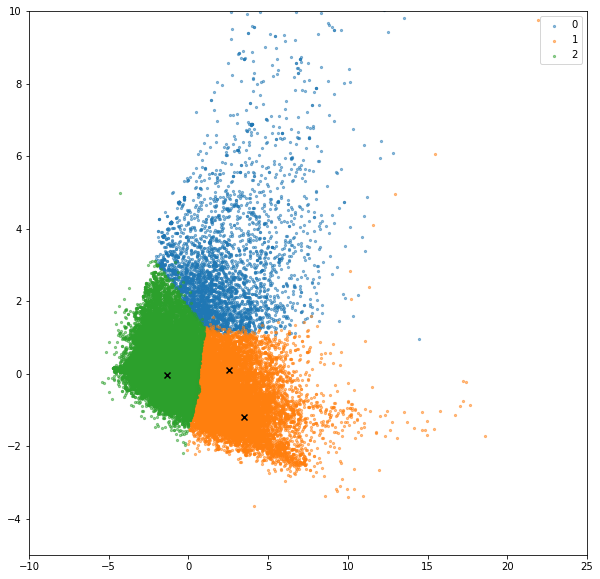

In [46]:
centers = kmeans.cluster_centers_
label = kmeans.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(data[label == i , 0] , data[label == i , 3] , label = i, s=5, alpha=0.5)
plt.scatter(centers[:,0], centers[:,1], marker="x",color='k')
#This is done to find the centroid for each clusters.
plt.xlim(-10,25)
plt.ylim(-5,10)
plt.legend()
plt.show()

(-5.0, 5.0)

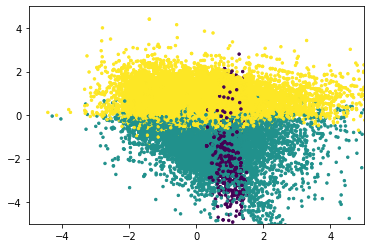

In [47]:
plt.scatter(scaled_features[:, 12], scaled_features[:, 9], s=6,c=label, cmap='viridis');
plt.xlim(-5, 5)
plt.ylim(-5, 5)

## K-means with 5 clusters

In [67]:
kmeans5 = KMeans(
    init="random",
    n_clusters=5,
    n_init=10,
    max_iter=300
)

In [69]:
kmeans5.fit(data)

KMeans(init='random', n_clusters=5)

In [54]:
# The lowest SSE value
kmeans5.inertia_

591435.2851619786

In [65]:
# Final locations of the centroid
kmeans5.cluster_centers_

array([[ 0.37687062,  0.30942833,  0.11297405, -0.40957336, -0.11789039],
       [ 3.67251199,  0.74282237,  0.03827449, -0.80867081, -0.41659482],
       [-1.99582754, -0.10483943,  0.09355738,  0.21875893,  0.05602536],
       [ 3.46598076, -1.18618377,  1.58767214,  0.08417092, 14.01106037],
       [ 2.19916655, -3.09640737, -1.78991497,  3.23750855, -0.52546344]])

In [63]:
# The number of iterations required to converge
kmeans5.n_iter_

23

In [64]:
kmeans5_silhouette = silhouette_score(
    scaled_features, kmeans5.labels_
).round(2)

kmeans5_silhouette

0.17

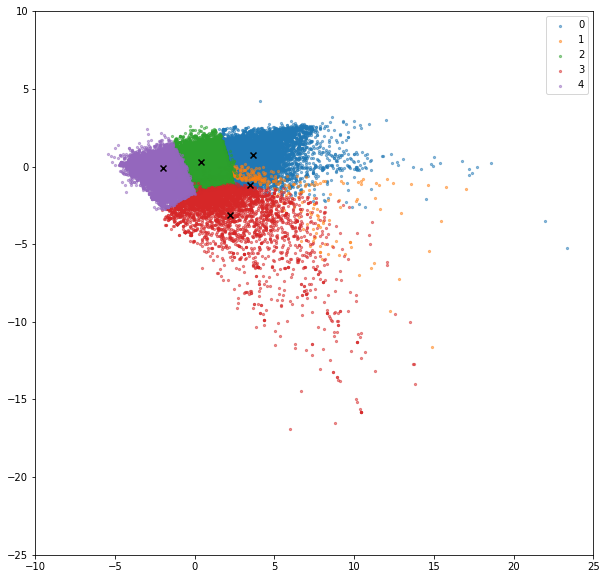

In [71]:
centers = kmeans5.cluster_centers_
label5 = kmeans5.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(data[label5 == i , 0] , data[label5 == i , 1] , label = i, s=5, alpha=0.5)
plt.scatter(centers[:,0], centers[:,1], marker="x",color='k')
#This is done to find the centroid for each clusters.
plt.xlim(-10,25)
plt.ylim(-25,10)
plt.legend()
plt.show()

(-5.0, 5.0)

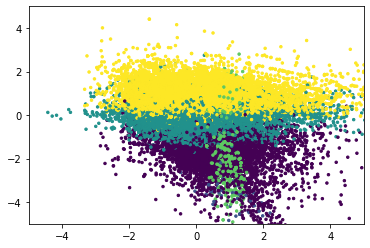

In [72]:
plt.scatter(scaled_features[:, 12], scaled_features[:, 9], s=6,c=label5, cmap='viridis');
plt.xlim(-5, 5)
plt.ylim(-5, 5)

### Log kow vs molecular weight

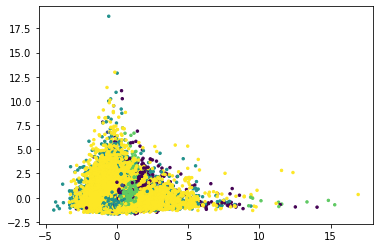

In [73]:
plt.scatter(scaled_features[:, 12], scaled_features[:, 26], s=6, c=label5, cmap='viridis');

### Looking at the labeled data only
I wanted to see whether the clusters found by k-means on the big dataset corresponded to the clusters found by only looking at the labeled data, so I filtered to only the data that is included in Bendik's dataset to compare

In [75]:
is_labeled=df.iloc[:,32]

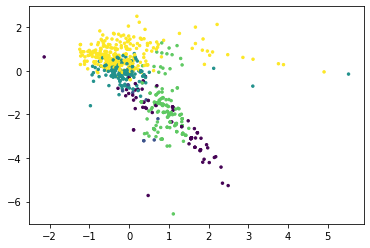

In [77]:
#showing the labeled (PBT concern/Bendik data only)
scaled_features_labeled = scaled_features[is_labeled == 1]
features_labeled = features.to_numpy()[is_labeled == 1]
kmeans5_labels_labeled = label5[is_labeled == 1]

#Showing PBT concern data only: log kow vs BIOWIN4
plt.scatter(scaled_features_labeled[:, 12], scaled_features_labeled[:, 9], s=6,c=kmeans5_labels_labeled, cmap='viridis');


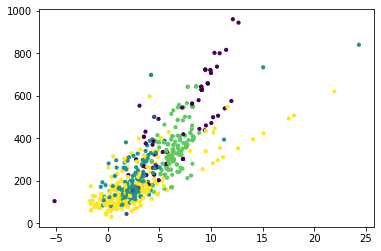

In [78]:
#Showing PBT concern data only: log kow vs MW
plt.scatter(features_labeled[:, 12], features_labeled[:, 26], s=10,c=kmeans5_labels_labeled, cmap='viridis');

## K-Means with 2 clusters

In [79]:
kmeans2 = KMeans(
    init="random",
    n_clusters=2,
    n_init=10,
    max_iter=300
)

In [80]:
kmeans2.fit(data)

KMeans(init='random', n_clusters=2)

In [81]:
# The number of iterations required to converge
kmeans2.n_iter_

6

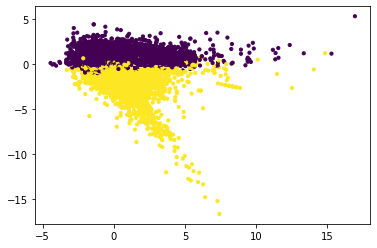

In [82]:
#scatter log kow vs biowin4
plt.scatter(scaled_features[:, 12], scaled_features[:, 9], s=10, c=kmeans2.labels_, cmap='viridis');

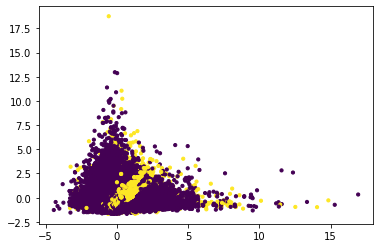

In [83]:
#log kow vs mw
plt.scatter(scaled_features[:, 12], scaled_features[:, 26], s=10, c=kmeans2.labels_, cmap='viridis');

### Looking at the labeled data only
I wanted to see whether the clusters found by k-means on the big dataset corresponded to the clusters found by only looking at the labeled data, so I filtered to only the data that is included in Bendik's dataset to compare it to the clustering found on that data only. It seems similar, judging from this plot

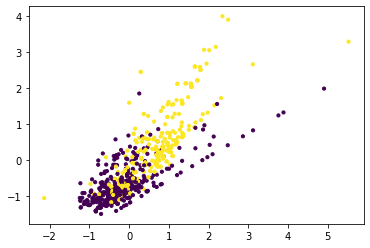

In [84]:
kmeans2_labels_labeled = kmeans2.labels_[is_labeled == 1]
#log kow vs mw
plt.scatter(scaled_features_labeled[:, 12], scaled_features_labeled[:, 26], s=10, c=kmeans2_labels_labeled, cmap='viridis');

## K-Means with 3 clusters
I also tried K-means with 3 clusters, because it had a high silhouette score. It seems to give very similar results to k-means with 2 clusters.

In [96]:
kmeans3 = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300
)

In [97]:
kmeans3.fit(scaled_features)

KMeans(init='random', n_clusters=3)

In [98]:
# The number of iterations required to converge
kmeans3.n_iter_

16

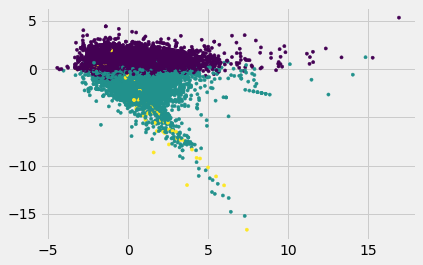

In [108]:
#scatter log kow vs biowin4
plt.scatter(scaled_features[:, 12], scaled_features[:, 9], s=10, c=kmeans3.labels_, cmap='viridis');

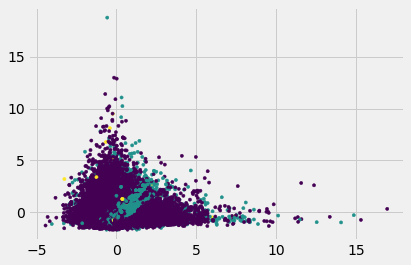

In [100]:
#log kow vs mw
plt.scatter(scaled_features[:, 12], scaled_features[:, 26], s=10, c=kmeans3.labels_, cmap='viridis');

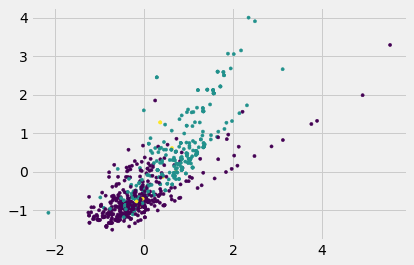

In [102]:
kmeans3_labels_labeled = kmeans3.labels_[is_labeled == 1]
#log kow vs mw
plt.scatter(scaled_features_labeled[:, 12], scaled_features_labeled[:, 26], s=10, c=kmeans3_labels_labeled, cmap='viridis');

## Gaussian Mixture model with 2 clusters
The GMM gives a very different cluster structure  than k-means (judging from this scatterplot). For log kow and BIOWIN4/MW we see much less of a clear division between the clusters.

In [85]:
from sklearn.mixture import GaussianMixture

In [86]:
gmm = GaussianMixture(n_components=2)
gmm.fit(data)

GaussianMixture(n_components=2)

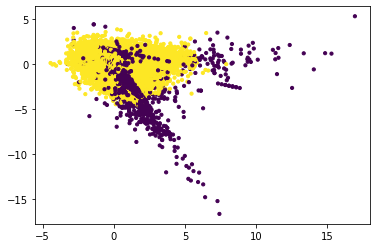

In [87]:
labels = gmm.predict(data)
plt.scatter(scaled_features[:, 12], scaled_features[:, 9], s=10, c=labels, cmap='viridis');

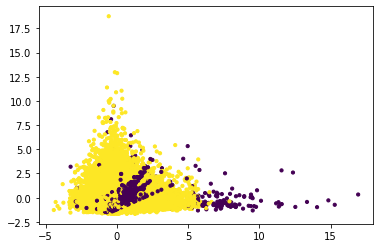

In [89]:
gmm_labels = gmm.predict(data)
plt.scatter(scaled_features[:, 12], scaled_features[:, 26], s=10, c=gmm_labels, cmap='viridis');

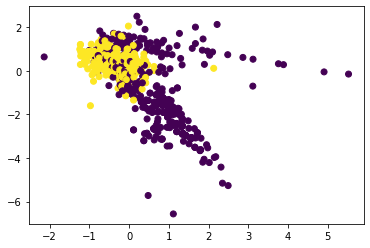

In [90]:
gmm_labels_labeled = gmm_labels[is_labeled == 1]
plt.scatter(scaled_features_labeled[:, 12], scaled_features_labeled[:, 9], c=gmm_labels_labeled, cmap='viridis');

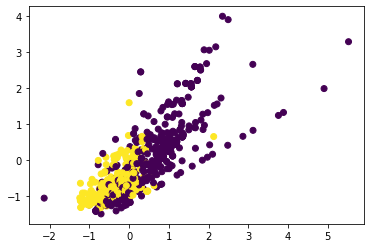

In [91]:
plt.scatter(scaled_features_labeled[:, 12], scaled_features_labeled[:, 26], c=gmm_labels_labeled, cmap='viridis');

## Gaussian Mixture model with 5 clusters

In [94]:
gmm5 = GaussianMixture(n_components=5)
gmm5.fit(data)

GaussianMixture(n_components=5)

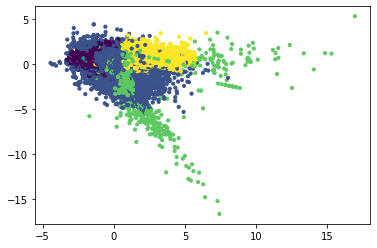

In [95]:
gmm5_labels = gmm5.predict(data)
plt.scatter(scaled_features[:, 12], scaled_features[:, 9], s=10, c=gmm5_labels, cmap='viridis');

## DBSCAN
I had a difficult time choosing the right epsilon value for DBSCAN. 

In [92]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

In [93]:
dbscan = DBSCAN(eps=2, min_samples=1000)
dbscan.fit(data)


DBSCAN(eps=2, min_samples=1000)

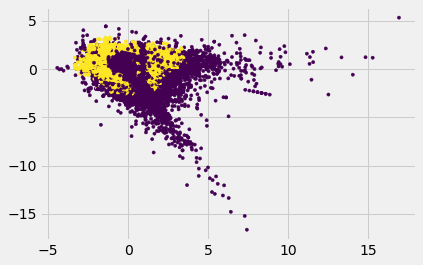

In [39]:
plt.scatter(scaled_features[:, 12], scaled_features[:, 9], s=10, c=dbscan.labels_, cmap='viridis');

In [43]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors()
nbrs = neigh.fit(scaled_features)
distances, indices = nbrs.kneighbors(scaled_features)

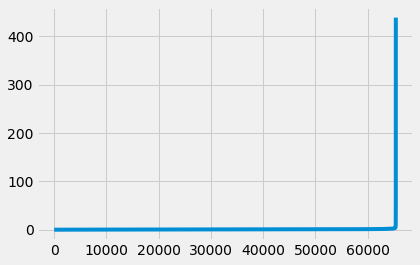

In [44]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)